In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
X,y = sklearn.datasets.make_moons(200, noise=0.20)

In [3]:
X

array([[ 1.64359003e+00,  2.19976174e-01],
       [ 1.05726421e+00,  2.55052258e-01],
       [ 6.43066484e-01, -7.68037228e-01],
       [ 1.27649343e+00, -1.33916873e-01],
       [-3.60966404e-01,  8.10154477e-01],
       [-1.42078356e-01,  8.18753829e-01],
       [ 9.65131324e-01,  5.79253419e-01],
       [ 9.61821273e-01,  9.68503106e-02],
       [-8.69935482e-01,  8.48032326e-01],
       [ 1.49315048e+00, -7.75147352e-01],
       [-8.31274674e-01,  6.20007243e-01],
       [ 4.30428054e-01,  1.82502599e-01],
       [ 5.59310817e-01, -3.64497993e-01],
       [-7.17242873e-01,  2.67965934e-01],
       [ 9.67070778e-01, -4.71866826e-01],
       [-2.85775779e-01,  7.31487935e-01],
       [ 2.09589243e+00,  3.76008557e-01],
       [ 1.94042195e+00,  3.80592003e-01],
       [ 1.06565908e+00,  3.32224459e-02],
       [ 8.98452980e-02,  8.95122156e-01],
       [ 2.03198742e+00,  1.74444562e-01],
       [ 4.94237778e-01,  1.00336373e-01],
       [ 5.17965855e-01,  6.19840970e-01],
       [ 1.

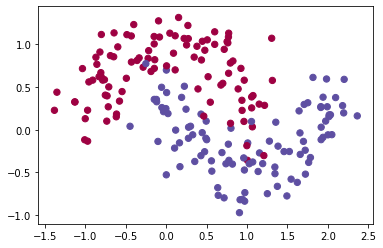

In [4]:
plt.scatter(X[:, 0],X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [5]:
X = torch.FloatTensor(X)

In [6]:
y = torch.LongTensor(y) # Long Tensors are good for labels

In [7]:
class FeedForward(nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward, self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)
        
    def forward(self, x): # We want to override the default foward function
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x

In [8]:
network = FeedForward(input_neurons=2, hidden_neurons=50, output_neurons=2)

In [9]:
optimizer = torch.optim.SGD(network.parameters(), lr=.02)

In [10]:
loss_fn = nn.CrossEntropyLoss() # Cannot use Binary Cross Entropy becuase it has more than one output

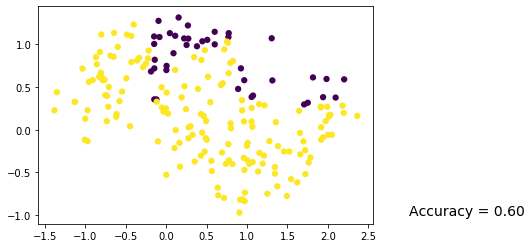

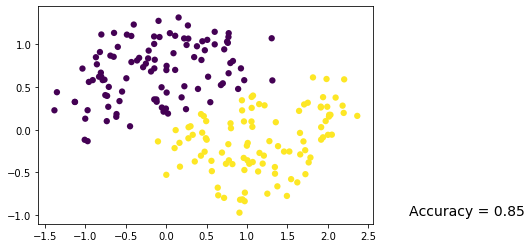

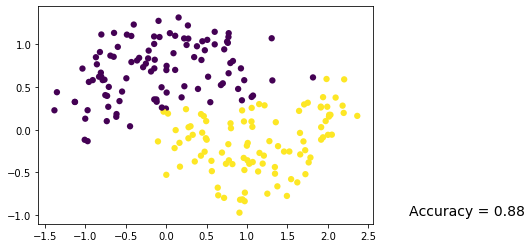

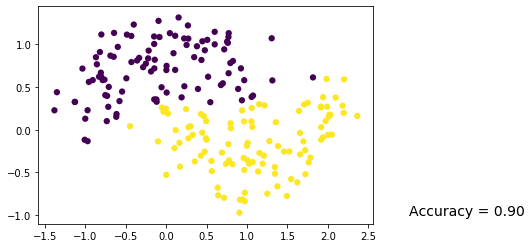

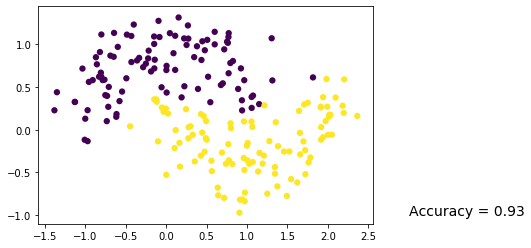

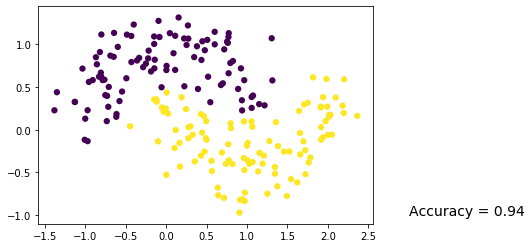

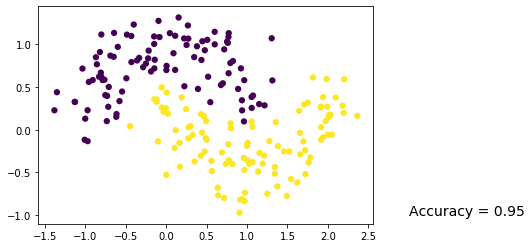

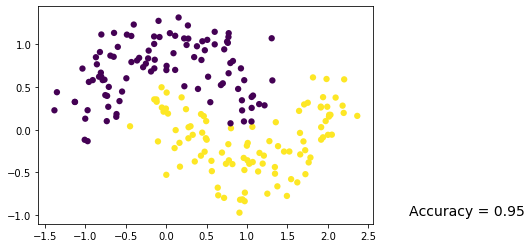

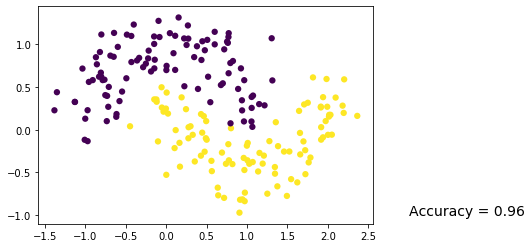

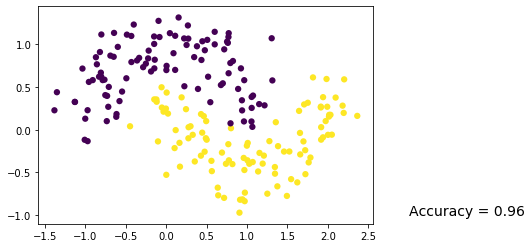

In [11]:
plt.ion() # interactive mode on
for epoch in range(10000):
    out = network(X) # or network.forward(X)
    loss = loss_fn(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        max_value, prediction = torch.max(out, 1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(X.data.numpy()[:,0],X.data.numpy()[:,1], s=40, c=predicted_y, lw=0)
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3,-1,'Accuracy = {:.2f}'.format(accuracy), fontdict={'size':14})
        plt.pause(0.1)
        
plt.ioff() # interactive mode off
plt.show()